In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import FinanceDataReader as fdr


import requests
import pandas as pd


def stock_to_df(code):
    stock = code
    response = requests.get("https://m.stock.naver.com/api/item/getPriceDayList.nhn?code={}&pageSize=10000&page=1".format(stock))

    df_stock = pd.DataFrame(response.json()["result"]["list"])
    df_stock.index = pd.to_datetime(df_stock["dt"], format="%Y%m%d").reset_index(drop=True)
    df_stock = df_stock.sort_index().drop("dt", axis=1)
    print("{} done.".format(code), end="\t")
    return df_stock

def pool_crawl(stock_list):
    pool = Pool(processes=(cpu_count() - 1))
    results = pool.map(stock_to_df, stock_list)
    pool.close()
    pool.join()
    return results




kospi_info = pd.read_csv("./market_info/kospi.csv", index_col=0)
kosdaq_info = pd.read_csv("./market_info/kosdaq.csv", index_col=0)
date_info = pd.read_csv("./market_info/date_df.csv", index_col=0)["dt"]
date_info = pd.to_datetime(date_info, format="%Y%m%d").sort_values(ascending=True).reset_index(drop=True)

kospi_list = fdr.StockListing("KOSPI")["Symbol"]
kosdaq_list = fdr.StockListing("KOSDAQ")["Symbol"]

df_kospi = pool_crawl(kospi_list)
df_kosdaq = pool_crawl(kosdaq_list)

df_open_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_close_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_high_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_low_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_rtn_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_vol_kospi = pd.DataFrame(columns=kospi_list, index=date_info)


df_open_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_close_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_high_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_low_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_rtn_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_vol_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)

for x, y in zip(df_kospi, kospi_list):
    df_open_kospi[y] = x["ov"]
    df_close_kospi[y] = x["ncv"]
    df_high_kospi[y] = x["hv"]
    df_low_kospi[y] = x["lv"]
    df_rtn_kospi[y] = x["cr"] / 100
    df_vol_kospi[y] = x["aq"]

for x, y in zip(df_kosdaq, kosdaq_list):
    df_open_kosdaq[y] = x["ov"]
    df_close_kosdaq[y] = x["ncv"]
    df_high_kosdaq[y] = x["hv"]
    df_low_kosdaq[y] = x["lv"]
    df_rtn_kosdaq[y] = x["cr"] / 100
    df_vol_kospi[y] = x["aq"]
    
    
df_open_kospi.to_csv("./kospi_open.csv")
df_close_kospi.to_csv("./kospi_close.csv")
df_high_kospi.to_csv("./kospi_high.csv")
df_low_kospi.to_csv("./kospi_low.csv")
df_rtn_kospi.to_csv("./kospi_rtn.csv")
df_vol_kospi.to_csv("./kospi_vol.csv")

df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")

001380 done.	034730 done.	011790 done.	014280 done.	002990 done.	214330 done.	004270 done.	251270 done.	006370 done.	000210 done.	009190 done.	047040 done.	001070 done.	001440 done.	084010 done.	016090 done.	007590 done.	102260 done.	002200 done.	123890 done.	025890 done.	020000 done.	004150 done.	011700 done.	006390 done.	097230 done.	012450 done.	005440 done.	267250 done.	094280 done.	298000 done.	005870 done.	095570 done.	000990 done.	069730 done.	039570 done.	089470 done.	092220 done.	001940 done.	092230 done.	003550 done.	229640 done.	100840 done.	003570 done.	036530 done.	006120 done.	096770 done.	005610 done.	002710 done.	012320 done.	013580 done.	001140 done.	074610 done.	005720 done.	004170 done.	031430 done.	003410 done.	008700 done.	005850 done.	023960 done.	009810 done.	002630 done.	001800 done.	118000 done.	077500 done.	102460 done.	007110 done.	007570 done.	044380 done.	003780 done.	002780 done.	109070 done.	003220 done.	002880 done.	005880 done.	001620 done.	023450 done.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib import rc

rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False

class bok_api():
    
    key = "RK4O8KBR4N0O4E2W6V9E"
    url_base = "http://ecos.bok.or.kr/api/"
    table = None
    stat_code = None
    data_format = {
        "DD": "%Y%m%d",
        "MM": "%Y%m",
        "YY": "%Y"
    }
    
    def __init__(self):
        self.url = self.url_base + "StatisticTableList/{}/json/kr/0/{}".format(self.key, str(1000))
        result = requests.get(self.url)
        result = pd.DataFrame(result.json()["StatisticTableList"]["row"])
        self.table = result
    
    def get_stat_list_detail(self, rows=1000, stat_code=""):
        if stat_code == "":
            raise ValueError("Stat code not provided! Please insert stat code!")
        self.url = self.url_base + "StatisticItemList/{}/json/kr/0/{}/{}".format(self.key, str(rows), stat_code)
        self.stat_code = stat_code
        result = requests.get(self.url)
        result = pd.DataFrame(result.json()["StatisticItemList"]["row"])
        self.table_detail = result
    
    def get_stat_data(self, rows=10000, start="19000101", end="30000101", item_code="", stat_code=""):
        if item_code == "":
            raise ValueError("Item code not provided! Please insert item code!")
        if stat_code != "":
            self.stat_code = stat_code
        self.item_code = item_code
        self.period = self.table_detail[self.table_detail["ITEM_CODE"] == self.item_code]["CYCLE"].values[0]
        data_format = self.data_format[self.period]
        self.url = self.url_base + "StatisticSearch/{}/json/kr/0/{}/{}/{}/{}/{}/{}".format(self.key, rows, self.stat_code, self.period, start, end, self.item_code)
        result = requests.get(self.url)
        result = pd.DataFrame(result.json()["StatisticSearch"]["row"])
        self.data = result
        self.data = self.data[["TIME", "DATA_VALUE"]]
        self.data.index = pd.to_datetime(self.data["TIME"], format=data_format)
        self.data = self.data["DATA_VALUE"].replace("", np.nan)
        return self.data
    

In [2]:
import requests
import FinanceDataReader as fdr
from bs4 import BeautifulSoup

listings = fdr.StockListing("KRX")

pages = range(1, 22)
kospi_200 = list()
for x in pages:
    url = "http://finance.naver.com/sise/entryJongmok.nhn?&page={}".format(x)
    result = requests.get(url)
    soup = BeautifulSoup(result.text, "lxml")
    items = soup.find_all("td", {"class": "ctg"})
    for item in items:
        kospi_200.append(item.text)
kospi_200 = set(kospi_200)
kospi_200_codes = listings[listings["Name"].isin(kospi_200)]["Symbol"].astype("str").reset_index(drop=True)

kospi_200_codes.to_csv("./kospi_200_list/kospi_200_list.csv")

In [3]:

df_kospi_high = pd.read_csv("./naver_stock/kospi_high.csv", index_col="dt")
df_kosdaq_high = pd.read_csv("./naver_stock/kosdaq_high.csv", index_col="dt")

df_kospi_low = pd.read_csv("./naver_stock/kospi_low.csv", index_col="dt")
df_kosdaq_low = pd.read_csv("./naver_stock/kosdaq_low.csv", index_col="dt")

df_kospi_close = pd.read_csv("./naver_stock/kospi_close.csv", index_col="dt")
df_kosdaq_close = pd.read_csv("./naver_stock/kosdaq_close.csv", index_col="dt")

### z_socre
df_kospi_close_std = df_kospi_close.rolling(21).std()
df_kospi_close_sma = df_kospi_close.rolling(21).mean()
df_kospi_z = (df_kospi_close - df_kospi_close_sma) / df_kospi_close_std

df_kosdaq_close_std = df_kosdaq_close.rolling(21).std()
df_kosdaq_close_sma = df_kosdaq_close.rolling(21).mean()
df_kosdaq_z = (df_kosdaq_close - df_kosdaq_close_sma) / df_kosdaq_close_std

df_kospi_z.to_csv("./techinical_indicators/kospi_z.csv")
df_kosdaq_z.to_csv("./techinical_indicators/kosdaq_z.csv")

### stochastic oscillator
lookback = 14
df_kospi_hh = df_kospi_high.rolling(lookback).max()
df_kosdaq_hh = df_kosdaq_high.rolling(lookback).max()




In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


def to_float(element):
    if (type(element) == str) and (len(element) != 0):
        res = element.replace('\"', "")
        return float(res)
    
class krx_indus_index():
    
    base_url = "http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx?name=fileDown&filetype=csv&url=MKD/13/1301/13010102/mkd13010102&type=2&ind_type={}&period_strt_dd={}&period_end_dd={}&pagePath=%2Fcontents%2FMKD%2F13%2F1301%2F13010102%2FMKD13010102.jsp"
    df_columns = ["date", "close", "chg", "%chg", "open", "high", "low", "vol", "vol_won", "mkt_cap"]
    
    codes_list = pd.read_csv("./krx_core/krx_index_indexno_csv.csv", header="infer")
    
    def __init__(self):
        pass
    
    def get_one_index(self, index_no="5300", start="19000101", end="30000101"):
        self.url = self.base_url.format(index_no, start, end)
        response = requests.get(self.url)
        download_url = "http://file.krx.co.kr/download.jspx"
        json_data = {"code": response.content}
        headers_json = {"Referer": "http://marketdata.krx.co.kr/contents/MKD/99/MKD9900001.jspx"}
        data = requests.post(download_url, data=json_data, headers=headers_json)
        parsing = BeautifulSoup(data.text)
        parsing = parsing.text.split("\n")
        parsing = [line.replace(",", "").strip('"') for line in parsing]
        parsing = [x.split('""') for x in parsing]
        parsing = pd.DataFrame(parsing[1:], columns=self.df_columns)
        parsing.index = pd.to_datetime(parsing["date"], format="%Y/%m/%d")
        parsing.drop("date", axis=1, inplace=True)
        self.data = parsing.astype("float64")
        return self.data
    
    def get_all_index(self, start="19000101", end="30000101"):
        
        

SyntaxError: invalid syntax (<ipython-input-2-9301079b6372>, line 21)

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_1 = "http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx?name=fileDown&filetype=csv&url=MKD/13/1301/13010302/mkd13010302&type=6&ind_type=1300&period_strt_dd=20000101&period_end_dd=30001231&pagePath=%2Fcontents%2FMKD%2F13%2F1301%2F13010302%2FMKD13010302.jsp"
response = requests.get(url_1)

url_2 = "http://file.krx.co.kr/download.jspx"
json_data = {
    "code" : response.content
}
headers_json = {
    "Referer": "http://marketdata.krx.co.kr/contents/MKD/99/MKD99000001.jspx"
}
columns = ["dt", "close", "change", "rate", "open", "high", "low"]
data = requests.post(url_2, data=json_data, headers=headers_json)
parsing = BeautifulSoup(data.text)
parsing_df = parsing.text.split("\n")
parsing_df = [x.split(",") for x in parsing_df]

parsing = BeautifulSoup(data.text)
parsing_df = parsing.text.split("\n")
parsing_df = [x.split(",") for x in parsing_df]
parsing_df = pd.DataFrame(parsing_df[1:], columns=columns)
parsing_df.index = parsing_df["dt"]
parsing_df.drop("dt", axis=1, inplace=True)

def to_float(element):
    if (type(element) == str) and (len(element) != 0):
        res = element.replace('\"', "")
        return float(res)

for column in parsing_df.columns:
    parsing_df[column] = parsing_df[column].apply(to_float).astype("float32")
    
parsing_df["rate"] /= 100
parsing_df.index = pd.to_datetime(parsing_df.index, format='"%Y/%m/%d"')
parsing_df.to_csv("./krx_web/vkospi_d.csv")

/home/chanmin/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/chanmin/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [8]:
parsing_df

,close,change,rate,open,high,low
dt,,,,,,
2019-04-19,12.450000,-0.400000,-0.0311,12.71,12.83,12.44
2019-04-18,12.850000,0.200000,0.0158,12.88,13.13,12.78
2019-04-17,12.650000,-0.010000,-0.0008,12.81,12.82,12.65
2019-04-16,12.660000,-0.260000,-0.0201,13.04,13.08,12.62
2019-04-15,12.920000,0.510000,0.0411,12.84,13.04,12.78
2019-04-12,12.410000,0.120000,0.0098,12.70,12.76,12.33
2019-04-11,12.290000,-18.110001,-0.5957,12.62,12.63,12.10
2019-04-10,30.400000,17.730000,1.3994,12.91,30.41,12.61
2019-04-09,12.670000,-0.480000,-0.0365,13.10,13.19,12.65


In [23]:
import matplotlib.pyplot as plt

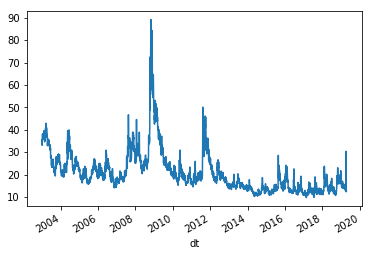

In [6]:
parsing_df["close"].plot()
plt.show()